In [184]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [185]:
from sklearn import isotonic

In [186]:
x = np.random.normal(0,1,100)
x = np.sort(x)
y = np.linspace(0,1,x.size)

In [187]:
iso = isotonic.isotonic_regression(y)

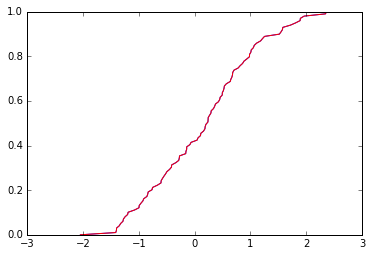

In [188]:
plt.plot(x, y)
plt.plot(x, iso, c='r')

In [189]:
from sklearn.isotonic import IsotonicRegression

In [190]:
iso_regressor = IsotonicRegression() 
iso_regressor.fit(x, y)

IsotonicRegression(increasing=True, out_of_bounds='nan', y_max=None,
          y_min=None)

In [191]:
iso2 = iso_regressor.predict(x)

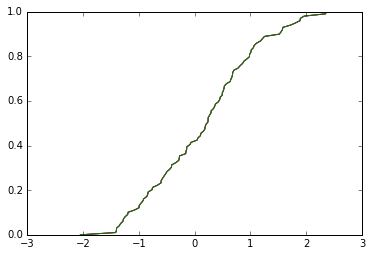

In [192]:
plt.plot(x, y)
plt.plot(x, iso, c='r')
plt.plot(x, iso2, c='g')



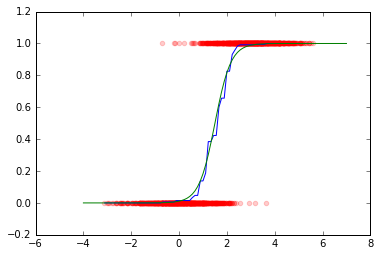

In [268]:
mean_1 = 3
x0 = np.random.normal(0,1,1000)
x0 = np.sort(x0)
x1 = np.random.normal(mean_1,1,1000)
x1 = np.sort(x1)
target = np.zeros(x0.size+x1.size)
target[x0.size:]=1.

iso_regressor.fit(np.hstack((x0,x1)), target)

test = np.linspace(-4,7,100)
plt.scatter(np.hstack((x0,x1)), target, alpha=0.2, color='r')
p = iso_regressor.predict(test)
plt.plot(test,p)
plt.plot(test, norm.pdf(test,loc=mean_1)/(norm.pdf(test,loc=mean_1)+norm.pdf(test,loc=0)))


(-0.1, 1.1)

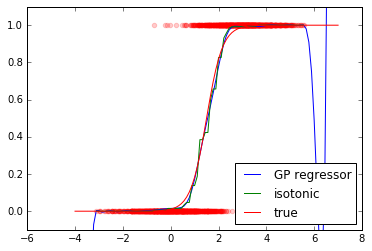

In [269]:
from sklearn.gaussian_process import GaussianProcessRegressor
gp = GaussianProcessRegressor()
gp.fit(np.hstack((x0,x1)).reshape(-1,1), target)

plt.scatter(np.hstack((x0,x1)), target, alpha=0.2, color='r')
p_gp = gp.predict(test.reshape(-1,1))
plt.plot(test,p_gp, label='GP regressor')
plt.plot(test,p, label='isotonic')
plt.plot(test, norm.pdf(test,loc=mean_1)/(norm.pdf(test,loc=mean_1)+norm.pdf(test,loc=0)), label='true')
plt.legend(loc='lower right')
plt.ylim(-.1,1.1)


In [270]:
np.argmax((p_gp-np.roll(p_gp,1))[1:]>0)
p_gp[9:12]

dummy = np.arange(100)
dummy.size, np.argmax((dummy-np.roll(dummy,1))[1:]>0)
np.argmax([True, True, True, False])

0

In [277]:
# some mistake in this algorithm
def force_monotonic(array, it=0):
    if it>10:
        return array.copy()
    first = np.argmax((array-np.roll(array,1))[1:]<=0)
    last = np.argmax((array-np.roll(array,1))[1:]>0)

    print(first, last)
    if first==0 and last==0:
        return array.copy()
    else:
        array[first:last]=array[last]
        force_monotonic(array, it=it+1)

In [278]:
p_gp_new = force_monotonic(p_gp)
print(p_gp_new, p_gp)
p_gp.copy

8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
None [ -3.22741225e+01  -2.04210670e+01  -1.19654013e+01  -6.38695818e+00
  -3.02812365e+00  -1.22079381e+00  -3.82758468e-01  -7.16238916e-02
   3.60995531e-03   3.37302685e-03  -4.36663628e-03  -3.76331806e-03
   6.91294670e-04   2.79664993e-03   1.21808052e-03  -1.54876709e-03
  -2.65026093e-03  -1.28126144e-03   1.23000145e-03   2.89487839e-03
   2.61783600e-03   8.28742981e-04  -1.09672546e-03  -1.90067291e-03
  -1.22117996e-03   3.71932983e-04   2.02369690e-03   3.13377380e-03
   3.80992889e-03   4.55188751e-03   5.77735901e-03   7.45487213e-03
   9.37175751e-03   1.10559464e-02   1.24292374e-02   1.34782791e-02
   1.45320892e-02   1.54542923e-02   1.62992477e-02   1.74245834e-02
   2.02856064e-02   2.79970169e-02   4.43229675e-02   7.29756355e-02
   1.15923405e-01   1.71811819e-01   2.37328053e-01   3.06676865e-01
   3.75708818e-01   4.41727519e-01   5.05312800e-01   5.69219947e-01
   6.35688901e-01   7.05464482e-01   7.76249647e-01   

<function ndarray.copy>

ValueError: x and y must not be None

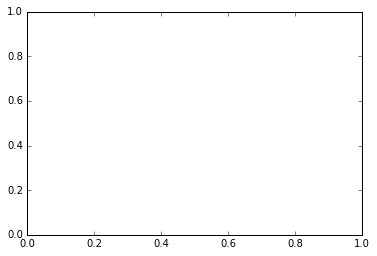

In [273]:
plt.plot(test,p_gp_new, label='GP regressor')
plt.plot(test,p, label='isotonic')
plt.plot(test, norm.pdf(test,loc=mean_1)/(norm.pdf(test,loc=mean_1)+norm.pdf(test,loc=0)), label='true')
plt.legend(loc='lower right')
plt.ylim(-.1,1.1)

In [274]:
from scipy.stats import norm

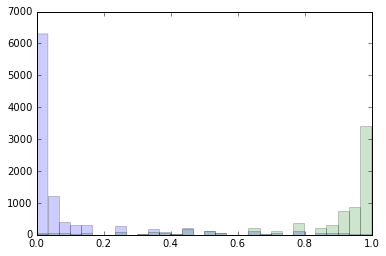

In [104]:
h = plt.hist(iso_regressor.predict(x0), bins=30, alpha=0.2)
h = plt.hist(iso_regressor.predict(x1), bins=h[1], alpha=0.2)

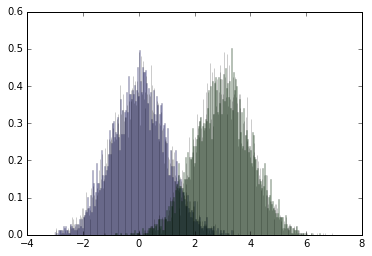

In [138]:
h0 = plt.hist((x0), bins=np.linspace(-3,7,600), normed=True, alpha=0.2)
h1 = plt.hist((x1), bins=np.linspace(-3,7,600), normed=True, alpha=0.2)

In [175]:
widths = (h0[1]-np.roll(h0[1],1))[1:]
cdf0 = np.cumsum(h0[0]*widths)
newbins0 = h0[1][np.searchsorted(cdf0, np.linspace(0,1,50))]
newbins0

widths = (h1[1]-np.roll(h1[1],1))[1:]
cdf1 = np.cumsum(h1[0]*widths)
newbins1 = h1[1][np.searchsorted(cdf1, np.linspace(0,1,50))]
newbins1

array([-3.        ,  0.93989983,  1.24040067,  1.40734558,  1.57429048,
        1.70784641,  1.80801336,  1.9081803 ,  2.00834725,  2.07512521,
        2.15859766,  2.22537563,  2.29215359,  2.35893155,  2.42570952,
        2.47579299,  2.54257095,  2.59265442,  2.6427379 ,  2.70951586,
        2.75959933,  2.8096828 ,  2.85976628,  2.90984975,  2.95993322,
        3.02671119,  3.06010017,  3.11018364,  3.16026711,  3.22704508,
        3.27712855,  3.32721202,  3.37729549,  3.42737896,  3.47746244,
        3.5442404 ,  3.61101836,  3.67779633,  3.74457429,  3.81135225,
        3.87813022,  3.96160267,  4.06176962,  4.14524207,  4.24540902,
        4.37896494,  4.52921536,  4.71285476,  4.9966611 ,  7.        ])

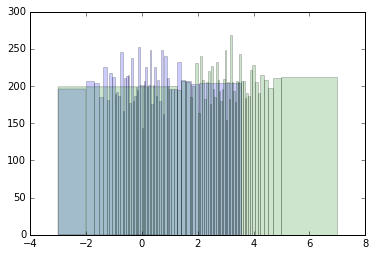

In [176]:
hnew0 = plt.hist(x0, bins=newbins0, normed=False, alpha=0.2)
hnew1 = plt.hist(x1, bins=newbins1, normed=False, alpha=0.2)

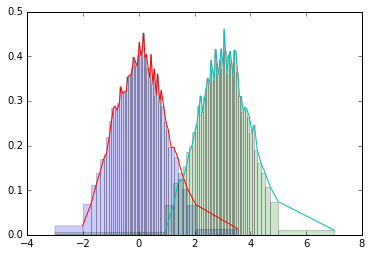

In [177]:
hnew0 = plt.hist(x0, bins=newbins0, normed=True, alpha=0.2)
hnew1 = plt.hist(x1, bins=newbins1, normed=True, alpha=0.2)
plt.plot(hnew0[1][1:], hnew0[0])
plt.plot(hnew1[1][1:], hnew1[0])

In [178]:
def p0(x):
    index0 = np.argmax(hnew0[1]>x)-1
    index1 = np.argmax(hnew1[1]>x)-1
    return hnew1[0][index1]/(hnew0[0][index0]+hnew1[0][index1])

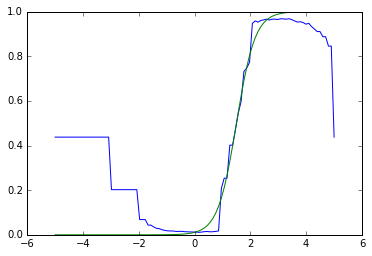

In [179]:
test = np.linspace(-5,5,100)
p0test = np.zeros(100)
for i, xx in enumerate(test):
    p0test[i] = p0(xx)

plt.plot(test,p0test)
plt.plot(test, norm.pdf(test,loc=mean_1)/(norm.pdf(test,loc=mean_1)+norm.pdf(test,loc=0)))


    